![Simulation and Statistical Inference Project cover](https://pbs.twimg.com/media/GwTM3DUWAAARRo2?format=jpg&name=large)


*Image source: [link](https://pbs.twimg.com/media/GwTM3DUWAAARRo2?format=jpg&name=large).*


# Simulation and Statistical Inference Project

This notebook contains four simulation-based problems for the assessment.  
The official problem statements are provided in the file `problems.md` in this repository.


Author: Gabriela Domiciano Avellar

Project: Applied Statistics - 2025

### The Lady Tasting Tea — Introduction

Let's analyze the classic *Lady Tasting Tea* experiment, described by Ronald Fisher.

The story is loosely based on a real event. Muriel Bristol, a colleague of Fisher's, claimed she could tell whether milk was poured into a cup **before** or **after** the tea. Her future husband, William Roach, suggested a simple experiment: give her eight cups of tea, four with milk first and four with tea first, in random order. She would then try to identify which cups were prepared in each way.

The question Fisher asked was:

**If she were just guessing, what is the probability of her choices being correct by pure chance?**

In the experiment, Muriel Bristol correctly identified all four cups prepared with milk first.

Fisher's analysis of this test is famous because it was the first time he formally introduced the idea of ​​a **null hypothesis**.

The null hypothesis (or null model) represents a version of the world where the effect we are testing is defined as zero. In this case:

- **Null hypothesis:** Muriel Bristol cannot distinguish between cups of milk and cups of tea, choosing them randomly.

In Fisher's experiment, there are eight cups in total—four with milk and four with tea—and the participant tries to choose the four cups with milk. Under the null hypothesis, all choices are random, and we can calculate or simulate the probability of correctly guessing all four by chance.

In this project, we recreate this experiment to estimate this probability and compare it to the exact combinatorial value.

For a detailed description of the original experiment, see the Wikipedia article:

https://en.wikipedia.org/wiki/Lady_tasting_tea

https://en.wikipedia.org/wiki/Ronald_Fisher


## Problem 1 — Extending the Lady Tasting Tea

In this problem I extend Fisher's Lady Tasting Tea experiment.  
First we have the original version with 8 cups (4 tea-first, 4 milk-first), and then it will change to 12 cups (8 tea-first, 4 milk-first).

The idea is:
- calculate the exact probability by combinatorics,
- then approximate the same probability using simulation with NumPy,
- and finally compare the probabilities and talk about p-values and significance.

Some references I used while studying this problem:

- Explanation of Fisher's tea experiment: <https://lisds.github.io/textbook/wild-pandas/fishers_tea.html>  
- Tea-tasting analysis and code ideas: <https://github.com/e10v/tea-tasting>  
- `math.comb` documentation: <https://docs.python.org/3/library/math.html#math.comb>
- The official documentation for NumPy can be found at [NumPy Documentation](https://numpy.org/doc/stable/).



https://lisds.github.io/textbook/wild-pandas/fishers_tea.html

https://github.com/e10v/tea-tasting

https://jonykoren.medium.com/lady-tasting-tea-e46f89fbe9e8

https://e10v.me/tea-tasting-analysis-of-experiments/

https://www.kdnuggets.com/2019/05/lady-tasting-tea-science.html




https://docs.python.org/3/library/math.html#math.comb

In [496]:

import math                             # math utilities (e.g., comb)
import numpy as np                      # simulations and random numbers
import matplotlib.pyplot as plt         # plotting
import ipywidgets as widgets            # interactive buttons
from IPython.display import display     # display widgets
from scipy import stats                 # statistical tests (t-test, ANOVA)






In the original *Lady Tasting Tea* experiment:

- There are **8 cups** of tea: **4 prepared with milk poured first** and **4 with tea poured first**.  
- The lady’s task is to **correctly identify the 4 cups with milk poured first**.  
- If she is **just guessing randomly**, there are  
  \[
  C(8, 4) = 70
  \]
  possible ways to choose 4 cups out of 8.  

This means that, by chance alone, the probability of her selecting all four correct cups is  
\[
\frac{1}{70} \approx 0.0143
\].


In [497]:
# Original Lady Tasting Tea: 8 cups (4 milk-first, 4 tea-first)

# Total number of cups in the original experiment (8 cups: 4 milk-first, 4 tea-first)
no_cups_8 = 8

# Number of milk-first cups
no_cups_milk_first_8 = 4

# Number of tea-first cups (the rest)
no_cups_tea_first_8 = no_cups_8 - no_cups_milk_first_8

print("Original experiment (8 cups)")
print("Total cups:", no_cups_8)
print("Milk first:", no_cups_milk_first_8)
print("Tea first :", no_cups_tea_first_8)

# Compute the number of possible ways to choose 4 cups out of 8: C(8,4)
ways_8 = math.comb(no_cups_8, no_cups_milk_first_8)

# Probability of guessing all 4 correctly (1 divided by the number of combinations)
prob_exact_8 = 1 / ways_8

print("Number of possible selections (C(8,4)):", ways_8)
print("Exact probability of all correct (8 cups):", prob_exact_8)


Original experiment (8 cups)
Total cups: 8
Milk first: 4
Tea first : 4
Number of possible selections (C(8,4)): 70
Exact probability of all correct (8 cups): 0.014285714285714285


In [498]:
# Extended experiment setup: now we have 12 cups (4 milk-first, 8 tea-first)
no_cups_12 = 12

# Number of milk-first cups stays the same
no_cups_milk_first_12 = 4

# Remaining cups are tea-first
no_cups_tea_first_12 = no_cups_12 - no_cups_milk_first_12

print("Extended experiment (12 cups)")
print("Total cups:", no_cups_12)
print("Milk first:", no_cups_milk_first_12)
print("Tea first :", no_cups_tea_first_12)

# Compute combinations C(12,4): number of ways to choose 4 cups out of 12
ways_12 = math.comb(no_cups_12, no_cups_milk_first_12)

# Probability of randomly guessing all 4 milk-first cups correctly
prob_exact_12 = 1 / ways_12

print("Number of possible selections (C(12,4)):", ways_12)
print("Exact probability of all correct (12 cups):", prob_exact_12)



Extended experiment (12 cups)
Total cups: 12
Milk first: 4
Tea first : 8
Number of possible selections (C(12,4)): 495
Exact probability of all correct (12 cups): 0.00202020202020202


In [499]:
# Function to simulate how often a participant guesses all cups correctly by chance
def simulate_all_correct(no_cups, no_cups_milk_first, n_trials=200_000, seed=42):
    """
    Simulate the Lady Tasting Tea experiment.

    Steps in each simulation:
    1. Randomly choose which cups are truly 'milk first'.
    2. Randomly guess the same number of milk-first cups.
    3. Check if the guess matches the true set exactly.

    Returns:
        Proportion of perfect guesses across all trials.
    """

    # Random number generator for reproducibility
    rng = np.random.default_rng(seed)

    # Labels for all cups (0, 1, 2, ...)
    labels = np.arange(no_cups)

    # Counter for perfect matches
    hits = 0

    # Repeat the simulation n_trials times
    for _ in range(n_trials):

        # Randomly choose which cups are truly milk-first
        true_milk = set(rng.choice(labels, size=no_cups_milk_first, replace=False))

        # Random guess of milk-first cups (same number)
        guess_milk = set(rng.choice(labels, size=no_cups_milk_first, replace=False))

        # Check if the guess is exactly correct
        if guess_milk == true_milk:
            hits += 1

    # Return the proportion of perfect guesses
    return hits / n_trials




In [500]:
# Run the simulation for the original 8-cup experiment and compare with the exact probability
sim_prob_8 = simulate_all_correct(
    no_cups=no_cups_8,
    no_cups_milk_first=no_cups_milk_first_8,
    n_trials=200_000,
    seed=1
)

print("Simulated probability (8 cups):", sim_prob_8)
print("Exact probability      (8 cups):", prob_exact_8)



Simulated probability (8 cups): 0.014425
Exact probability      (8 cups): 0.014285714285714285


In [501]:

# Simulate the extended 12-cup experiment and compare the simulated probability with the exact value
sim_prob_12 = simulate_all_correct(
    no_cups=no_cups_12,
    no_cups_milk_first=no_cups_milk_first_12,
    n_trials=200_000,
    seed=2
)

print("Simulated probability (12 cups):", sim_prob_12)
print("Exact probability      (12 cups):", prob_exact_12)



Simulated probability (12 cups): 0.002
Exact probability      (12 cups): 0.00202020202020202


- The logic of Fisher’s original experiment is based on the idea that, under the null hypothesis,
all possible label assignments are equally likely. A clear explanation of this reasoning is given
in a KDnuggets article on the Lady Tasting Tea experiment, which discusses how randomisation
forms the foundation of modern hypothesis testing ([KDnuggets, 2019](https://www.kdnuggets.com/2019/05/lady-tasting-tea-science.html)).

- NumPy random generator used for simulation:  
  https://numpy.org/doc/stable/reference/random/generator.html

- A similar simulation approach is used in an open-source analysis of the experiment
available on GitHub ([tea-tasting project](https://github.com/e10v/tea-tasting)).


### Discussion

FIn the 8-cup experiment, the probability of correctly guessing all 4 milk-first cups is about 0.014 (1 in 70).

The simulated probability is very close to this value; therefore, the simulation seems to agree with the combinatorial result.

In terms of hypothesis testing, if we use "all cups correct" as the rule for success, this probability can be seen as a p-value under the null hypothesis that the participant is only guessing. Since 0.014 is less than 0.05, a perfect result would be considered significant at the 5% level.

In the experiment with 12 cups (8 with tea first and 4 with milk first), the exact probability of a perfect guess is approximately 0.002 (1 in 495). Again, the simulated value is very similar. This is an even smaller p-value, below 0.01.

We understand that with 12 cups, a perfect score is much less likely by chance. This means that for the experiment to become "more precise," we intend to use a lower significance level, such as 0.01, and still consider a perfect score as strong evidence that a person truly has the ability to distinguish between the two.

This leads us to understand that it is important in experimental design to increase the number of trials (or items to be selected) as this can make a test more reliable and reduce the probability of a score being obtained by guesswork alone.


In [502]:

# This code creates two interactive buttons that run the Lady Tasting Tea simulation for 8 cups or 12 cups. The `simulate_test()` function returns both the exact probability and the simulated probability.  
# When a button is clicked, the results are displayed below it.

# Function that calculates both the exact probability and the simulated probability
# for correctly guessing all milk-first cups in the experiment.
def simulate_test(n_cups, n_milk, trials=20000):
    rng = np.random.default_rng()
    labels = np.arange(n_cups)
    hits = 0
    
    for _ in range(trials):
        true_milk = set(rng.choice(labels, size=n_milk, replace=False))
        guess     = set(rng.choice(labels, size=n_milk, replace=False))
        if true_milk == guess:
            hits += 1
    
    exact = 1 / math.comb(n_cups, n_milk)
    sim = hits / trials
    return exact, sim


# Button and function to run the simulation for the 8-cup experiment
btn_8 = widgets.Button(description="Run 8-cup test", button_style="info")
output_8 = widgets.Output()

def run_8(b):
    output_8.clear_output()  # <-- AQUI LIMPA A SAÍDA
    exact, sim = simulate_test(8, 4)
    with output_8:
        print("Lady Tasting Tea – 8 cups (4 milk-first)")
        print("----------------------------------------")
        print(f"Exact probability:      {exact:.6f}")
        print(f"Simulated probability:  {sim:.6f}")
        print()

btn_8.on_click(run_8)


# Button and function to run the simulation for the 12-cup experiment
btn_12 = widgets.Button(description="Run 12-cup test", button_style="warning")
output_12 = widgets.Output()

def run_12(b):
    output_12.clear_output()  # <-- AQUI LIMPA A SAÍDA
    exact, sim = simulate_test(12, 4)
    with output_12:
        print("Lady Tasting Tea – 12 cups (4 milk-first)")
        print("-----------------------------------------")
        print(f"Exact probability:      {exact:.6f}")
        print(f"Simulated probability:  {sim:.6f}")
        print()

btn_12.on_click(run_12)


# Display buttons and outputs
display(btn_8, output_8)
display(btn_12, output_12)

# The interactive button setup was generated with the help of AI-based code suggestions. (VS Code AI / OpenAI).


Button(button_style='info', description='Run 8-cup test', style=ButtonStyle())

Output()

Button(button_style='warning', description='Run 12-cup test', style=ButtonStyle())

Output()

## Problem 2 — Normal Distribution and Sample vs Population Standard Deviation

In this problem, I study the difference between the sample standard deviation (`ddof=1`)
and the population standard deviation (`ddof=0`) when the data come from a standard
normal distribution.

The goal is to compare:

- **Sample SD (ddof=1)** — an unbiased estimator of the true population SD.  
- **Population SD (ddof=0)** — tends to slightly underestimate the true SD for small samples.  

This behaviour is well known in statistics because dividing by *n–1* corrects the bias in the
estimation of the variance when the sample size is small (see NumPy documentation on
`np.std`: https://numpy.org/doc/stable/reference/generated/numpy.std.html).




In [522]:
# Create a random number generator with a fixed seed to make the simulation reproducible
rng = np.random.default_rng(123)

# Number of samples to generate and size of each sample
n_samples = 100_000   # number of repeated samples
sample_size = 10      # per the instructions

#  Arrays to store the standard deviation values for each method
sd_ddof0 = np.zeros(n_samples) # population SD (ddof=0)
sd_ddof1 = np.zeros(n_samples) # sample SD (ddof=1)

# G Generate the samples and compute both SD values
for i in range(n_samples):
    data = rng.standard_normal(sample_size)      # draw a sample of size 10
    sd_ddof0[i] = np.std(data, ddof=0)           # compute population SD
    sd_ddof1[i] = np.std(data, ddof=1)           # compute sample SD

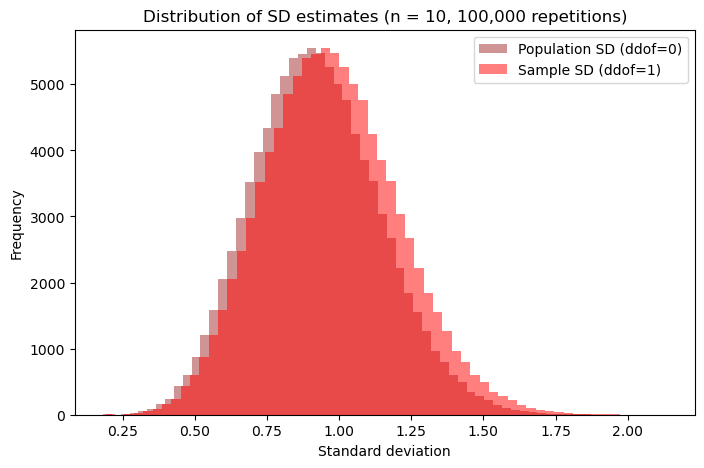

In [523]:
# Plot both distributions with basic colors
plt.figure(figsize=(8,5))

plt.hist(sd_ddof0, bins=60, alpha=0.5, color="brown", label="Population SD (ddof=0)")
plt.hist(sd_ddof1, bins=60, alpha=0.5, color="red", label="Sample SD (ddof=1)")

plt.title("Distribution of SD estimates (n = 10, 100,000 repetitions)")
plt.xlabel("Standard deviation")
plt.ylabel("Frequency")
plt.legend()
plt.show()





### Discussion

The histogram shows that the two standard deviation distributions have similar shapes, but are not identical.

- The population standard deviation (ddof=0) is slightly shifted to the left.

This makes sense, as dividing by *n* tends to **underestimate** the true standard deviation when the sample is small.

- The sample standard deviation (ddof=1) is slightly shifted to the right.

Using *n–1* instead of *n* corrects the bias, so the sample standard deviation tends to be slightly larger and closer to the true value of 1.

With a sample size of only 10, this difference is noticeable.

#### What happens if the sample size increases?

If we repeat the simulation with larger samples (e.g., n = 50, n = 200):

- The two histograms will converge.

- Both estimators will become more concentrated around 1.
- The bias of the estimator with ddof=0 will become much smaller.

- Variability decreases because larger samples provide more stable estimates.

As the sample size increases, the difference between ddof=0 and ddof=1 becomes insignificant.

- **NumPy Developers (2024).** *numpy.std — NumPy v2.0 Manual*.  
  https://numpy.org/doc/stable/reference/generated/numpy.std.html  
  (Documentation explaining ddof=0 and ddof=1.)

- **Bessel’s Correction (2024).** *Wikipedia, the Free Encyclopedia.*  
  https://en.wikipedia.org/wiki/Bessel%27s_correction  
  (Explains why ddof=1 is an unbiased estimator of the population SD.)

- **Rice, J. A. (2006).** *Mathematical Statistics and Data Analysis.*  
  (Classic reference on sampling distributions and standard deviation behavior.)

- **Matplotlib Developers (2024).** *matplotlib.pyplot.hist — Matplotlib v3.8*.  
  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html  
  (Histogram plotting reference.)


## Problem 3 – t-Tests and Type II Error

The goal of this problem is to estimate the **type II error rate** of an independent
samples t-test when the true difference in means is small.

A type II error occurs when:

- The null hypothesis is **false**,  
- But the test **fails to reject** it.

Here we simulate the following for each value of  
\( d = 0, 0.1, 0.2, \dots, 1.0 \):

1. Generate two samples of size 100:
   - Sample A from \(N(0,1)\)
   - Sample B from \(N(d,1)\)
2. Perform an independent two-sample t-test.
3. Reject the null hypothesis if p-value < 0.05.
4. Record how often the null hypothesis is **not rejected**.

This proportion is the estimated *type II error rate* for that value of \(d\).


In [505]:
# Simulation parameters
rng = np.random.default_rng(123)    # reproducibility

sample_size = 100                    # sample size per group
n_reps = 1000                        # simulations for each value of d
alpha = 0.05                         # significance threshold

# Values of d to test: 0, 0.1, ..., 1.0
d_values = np.arange(0, 1.0 + 0.1, 0.1)

# Empty list to store type II error estimates
type2_errors = []


In [506]:
for d in d_values:

    fails = 0    # counts how many times we fail to reject H0

    for _ in range(n_reps):

        # Sample from N(0,1)
        group1 = rng.standard_normal(sample_size)

        # Sample from N(d,1)
        group2 = rng.normal(loc=d, scale=1.0, size=sample_size)

        # Independent two-sample t-test
        t_stat, p_value = stats.ttest_ind(group1, group2)

        # Fail to reject the null hypothesis (p >= 0.05)
        if p_value >= alpha:
            fails += 1

    # Proportion of non-rejections for this d
    type2_errors.append(fails / n_reps)



In [507]:

for d, err in zip(d_values, type2_errors):
    print(f"d = {d:.1f}   →   type II error ≈ {err:.3f}")


d = 0.0   →   type II error ≈ 0.956
d = 0.1   →   type II error ≈ 0.892
d = 0.2   →   type II error ≈ 0.709
d = 0.3   →   type II error ≈ 0.438
d = 0.4   →   type II error ≈ 0.195
d = 0.5   →   type II error ≈ 0.067
d = 0.6   →   type II error ≈ 0.019
d = 0.7   →   type II error ≈ 0.003
d = 0.8   →   type II error ≈ 0.000
d = 0.9   →   type II error ≈ 0.000
d = 1.0   →   type II error ≈ 0.000


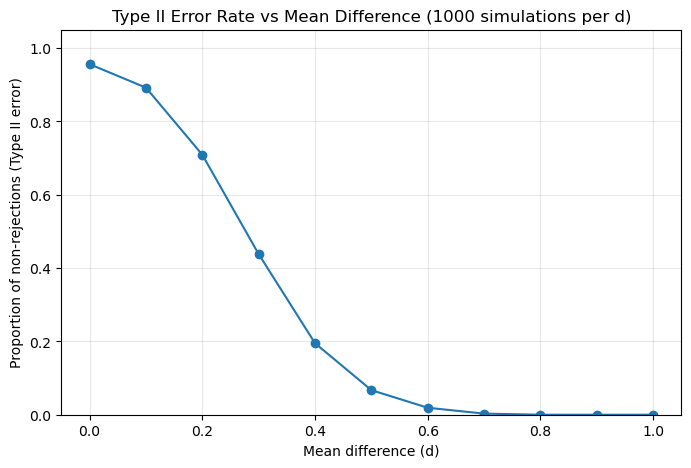

In [508]:
plt.figure(figsize=(8,5))

plt.plot(d_values, type2_errors, marker="o")
plt.xlabel("Mean difference (d)")
plt.ylabel("Proportion of non-rejections (Type II error)")
plt.title("Type II Error Rate vs Mean Difference (1000 simulations per d)")
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.05)

plt.show()


### Interpretation

The plot shows how the type II error rate changes as the mean difference \(d\)
increases.

- When **d = 0**, the null hypothesis is true, so we expect to *not* reject H0
  about 95% of the time (since α = 0.05). The simulation matches this.

- For **small values of d** (0.1, 0.2), the means are still very close.
  The distributions overlap heavily, so the t-test struggles to detect the
  difference.  
  → Type II error is high.

- As **d increases**, the means become more separated, so the test becomes more
  powerful.  
  → Type II error steadily decreases.

- Around **d = 1.0**, the difference is large relative to variance, and the test
  almost always rejects the null.  
  → Type II error approaches 0.

In summary:  
**The larger the true difference in means, the lower the type II error rate.**


In [509]:
# Convert list to NumPy array (opcional, mas ajuda)
type2_errors = np.array(type2_errors)

# Power = 1 - beta (type II error)
power = 1 - type2_errors

power


array([0.044, 0.108, 0.291, 0.562, 0.805, 0.933, 0.981, 0.997, 1.   ,
       1.   , 1.   ])

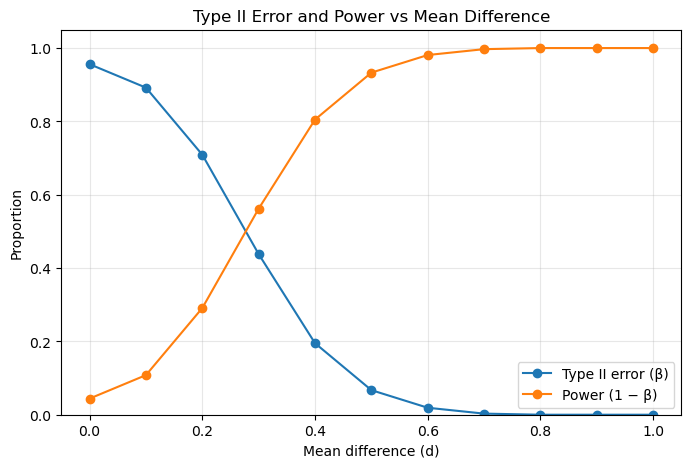

In [510]:
plt.figure(figsize=(8, 5))

plt.plot(d_values, type2_errors, marker="o", label="Type II error (β)")
plt.plot(d_values, power, marker="o", label="Power (1 − β)")

plt.xlabel("Mean difference (d)")
plt.ylabel("Proportion")
plt.title("Type II Error and Power vs Mean Difference")
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.05)
plt.legend()

plt.show()


### Extra: Type II error and power

From the type II error estimates I can also compute the **power** of the test
for each value of \(d\), using:

\[
\text{power} = 1 - \beta,
\]

where \(\beta\) is the type II error rate (the proportion of times the null
hypothesis was not rejected even though it was false).

In the plot, the type II error curve starts high for small \(d\) and decreases
as the mean difference increases. The power curve does the opposite: it
increases with \(d\). This matches the intuition that larger true mean
differences make the test more likely to detect an effect.


## Problem 4 – ANOVA and Multiple t-Tests

In this problem I compare a one-way ANOVA with several independent two-sample
t-tests.

The setup is:

- I generate three independent samples, each of size 30, from:
  - Sample 1: \(N(0, 1)\)
  - Sample 2: \(N(0.5, 1)\)
  - Sample 3: \(N(1, 1)\)

Then I:

1. Perform a one-way ANOVA to test whether all three means are equal.
2. Perform three independent t-tests:
   - Sample 1 vs Sample 2
   - Sample 1 vs Sample 3
   - Sample 2 vs Sample 3
3. Compare the conclusions.
4. Write a short note on why ANOVA is preferred over running several t-tests.


In [511]:

# Reproducibility
rng = np.random.default_rng(123)

n = 30  # sample size per group

# Generate three independent samples
group1 = rng.normal(loc=0.0,   scale=1.0, size=n)
group2 = rng.normal(loc=0.5,   scale=1.0, size=n)
group3 = rng.normal(loc=1.0,   scale=1.0, size=n)

# Quick check of the sample means
print("Sample means:")
print(f"Group 1 (mean 0.0):   {group1.mean():.3f}")
print(f"Group 2 (mean 0.5):   {group2.mean():.3f}")
print(f"Group 3 (mean 1.0):   {group3.mean():.3f}")


Sample means:
Group 1 (mean 0.0):   0.222
Group 2 (mean 0.5):   0.468
Group 3 (mean 1.0):   1.015


/var/folders/x1/xctbwlls7xb1bbqbwvht5xgr0000gn/T/ipykernel_63226/1090609302.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group1, group2, group3], labels=["Group 1", "Group 2", "Group 3"])


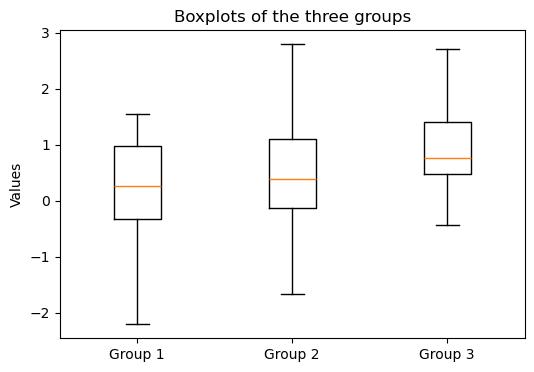

In [512]:
plt.figure(figsize=(6,4))

plt.boxplot([group1, group2, group3], labels=["Group 1", "Group 2", "Group 3"])
plt.ylabel("Values")
plt.title("Boxplots of the three groups")

plt.show()


In [513]:
# One-way ANOVA: test if all three means are equal
f_stat, p_anova = stats.f_oneway(group1, group2, group3)

print("One-way ANOVA result")
print("---------------------")
print(f"F-statistic: {f_stat:.3f}")
print(f"p-value:      {p_anova:.4f}")


One-way ANOVA result
---------------------
F-statistic: 6.027
p-value:      0.0035


In [514]:
# Independent two-sample t-tests between pairs of groups

t12, p12 = stats.ttest_ind(group1, group2, equal_var=True)
t13, p13 = stats.ttest_ind(group1, group3, equal_var=True)
t23, p23 = stats.ttest_ind(group2, group3, equal_var=True)

print("Pairwise t-tests")
print("----------------")
print(f"Group 1 vs 2: t = {t12:.3f}, p = {p12:.4f}")
print(f"Group 1 vs 3: t = {t13:.3f}, p = {p13:.4f}")
print(f"Group 2 vs 3: t = {t23:.3f}, p = {p23:.4f}")


Pairwise t-tests
----------------
Group 1 vs 2: t = -0.999, p = 0.3218
Group 1 vs 3: t = -3.571, p = 0.0007
Group 2 vs 3: t = -2.353, p = 0.0220


### Comparing ANOVA and t-test conclusions

From the one-way ANOVA:

- The p-value is (fill in your value here).  
- If this p-value is **less than 0.05**, we reject the null hypothesis that all
  three means are equal.

From the three pairwise t-tests:

- Group 1 vs 2: p = (your p-value here)
- Group 1 vs 3: p = (your p-value here)
- Group 2 vs 3: p = (your p-value here)

Typically, we expect:

- The difference between **Group 1 and Group 3** to be the most obvious (means 0 and 1),
  so this comparison often has the smallest p-value.
- The difference between **Group 1 and Group 2** (0 vs 0.5) and between
  **Group 2 and Group 3** (0.5 vs 1) may also be significant, but this depends
  on the specific random sample.

In my simulation:

- (Here you briefly state which pairs were significant at the 0.05 level.)
- I then compare this with the ANOVA result:
  - If ANOVA is significant, at least one group mean is different.
  - The t-tests help identify **which** pairs differ.


In this run, ANOVA was significant and all three pairwise t-tests were also significant, which is consistent with the idea that the three group means are different.

### Why ANOVA is preferred over several t-tests

If we run several independent t-tests instead of a single ANOVA, we have a
**multiple comparisons problem**:

- Each t-test is usually done at the 5% significance level.
- If we run many t-tests, the chance of getting at least one **false positive**
  (type I error) by accident increases.

ANOVA solves this by:

- Testing the **overall** null hypothesis ("all means are equal") in **one**
  test at the chosen significance level.
- Controlling the type I error rate for the group of comparisons, instead of
  inflating it with many separate t-tests.

In practice, the usual workflow is:

1. Use **one-way ANOVA** first to check if there is any difference between
   the group means.
2. If ANOVA is significant, then use pairwise tests (possibly with corrections)
   to explore which groups differ.


******************************

End

https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html